[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mravanba/comp551-notebooks/blob/master/Gaussian.ipynb)

# Normal Distribution

In [1]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

## univariate Gaussian 
Recall the PDF of a univariate Gaussian
$$p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left ({-\frac{1}{2}\left (\frac{x - \mu}{\sigma} \right )^2} \right )$$

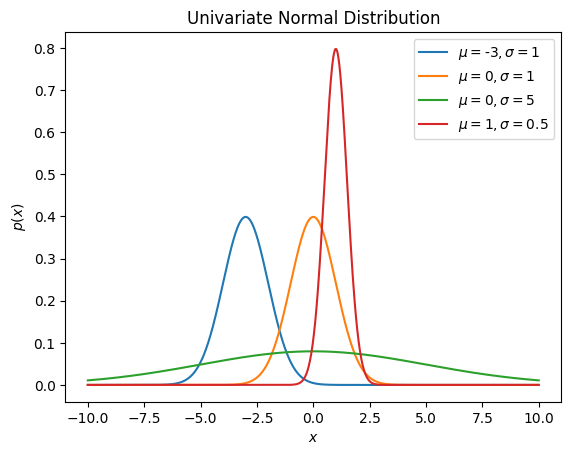

In [2]:
class Gaussian:
    """
    Class for univariate (1D) Gaussian distribution.
    
    The PDF (probability density function) is:
    p(x; μ, σ²) = (1/√(2πσ²)) * exp(-(x-μ)²/(2σ²))
    """
    def __init__(self, mu=0, sigma=1):
        """
        Initialize a univariate Gaussian distribution.
        
        Parameters:
        mu: mean of the distribution (center of the bell curve)
        sigma: standard deviation (controls the width of the bell curve)
        """
        self.mu, self.sigma = mu, sigma
        
    def density(self, x):
        """
        Compute the probability density at point(s) x.
        
        Parameters:
        x: scalar or array of values where we want to evaluate the density
        
        Returns:
        p: probability density value(s) at x, same shape as x
        """
        # Normalization factor: 1/√(2πσ²)
        # This ensures the total area under the curve equals 1
        normalization = (2 * np.pi * self.sigma**2)**(-0.5)
        
        # Quadratic term: ((x - μ)/σ)²
        # Measures how many standard deviations x is from the mean
        # Division by sigma makes the distribution scale-invariant
        quadratic = ((x - self.mu) / self.sigma)**2
        
        # Complete PDF: normalization * exp(-0.5 * quadratic)
        return normalization * np.exp(-0.5 * quadratic)

# Instantiate the Gaussian class with default parameters (μ=0, σ=1)
# This creates a standard normal distribution
gaussian = Gaussian()

# Generate 1000 evenly spaced values of x from -10 to 10
# These will be the x-axis points for plotting
x_vals = np.linspace(-10, 10, 1000)

# Different (mean, std dev) parameters to visualize
# Each tuple will create a different bell curve
params = [(-3, 1), (0, 1), (0, 5), (1, 0.5)]

# Plot the density for different mean and standard deviation combinations
for mu, sigma in params:
    # Update the Gaussian parameters for this iteration
    gaussian.mu, gaussian.sigma = mu, sigma
    
    # Compute probability density values at all x_vals
    # p_vals has shape (1000,) - one density value per x value
    p_vals = gaussian.density(x_vals)
    
    # Plot this density curve with a label showing the parameters
    plt.plot(x_vals, p_vals, label=r"$\mu=$"+str(mu)+r"$, \sigma=$"+str(sigma))

# Add axis labels using LaTeX notation
plt.xlabel(r"$x$")
plt.ylabel(r"$p(x)$")
plt.legend()
plt.title(r"Univariate Normal Distribution")
plt.show()

### Central limit theorem
Gaussian distribution has properties that makes it special. An important property is that the average of iid random variables --under some assumptions-- has a Gaussian distribution. Various forms of this statement are known as **central limit theorems**.
Let's throw different numbers of dice and look at the distribution of their average.

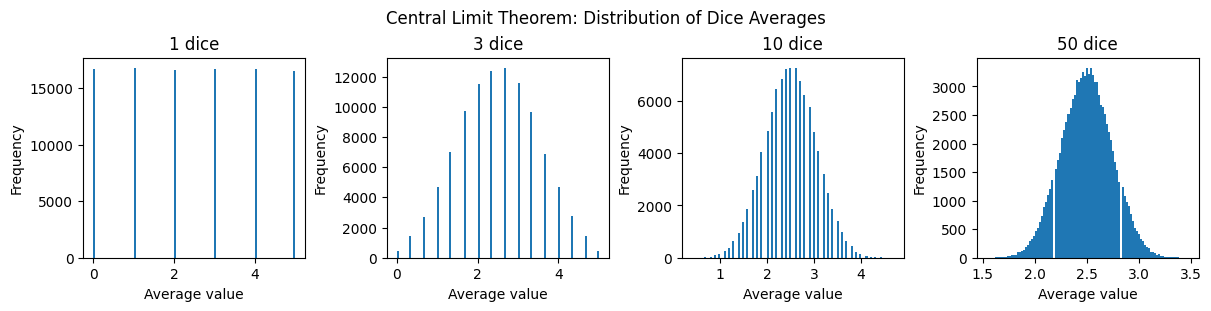

In [3]:
# Central Limit Theorem demonstration
# Shows that averaging more dice rolls produces a more Gaussian distribution

# Number of dice to average in each experiment
# Each die roll is iid (independent and identically distributed) uniform from 0 to 5
# Mean of a single die: 2.5, as faces are {0, 1, 2, 3, 4, 5}
num_dice = [1, 3, 10, 50]

# Create subplots: one for each number of dice
fig, axes = plt.subplots(ncols=len(num_dice), nrows=1, constrained_layout=True, 
                         figsize=(len(num_dice)*3, 3))

for i, n in enumerate(num_dice):
    # Generate random dice rolls and compute averages
    # np.random.randint(0, 6, (n, 100000)) creates shape (n, 100000)
    #   - Each row represents one die
    #   - Each column represents one trial
    #   - Values are integers from 0 to 5 (6 is exclusive)
    # np.mean(..., axis=0) averages along axis 0 (across dice)
    #   - Input shape: (n, 100000) where n is number of dice
    #   - Output shape: (100000,) - one average per trial
    #   - This computes the mean of n dice for each of 100000 trials
    trials = np.mean(np.random.randint(0, 6, (n, 100000)), axis=0)
    
    # Plot histogram of the averages using 100 bins
    # As n increases, the distribution becomes more bell-shaped (Gaussian)
    # This is the Central Limit Theorem in action
    axes[i].hist(trials, bins=100)
    axes[i].set_xlabel('Average value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{n} dice')

plt.suptitle('Central Limit Theorem: Distribution of Dice Averages')
plt.show()

### Maximum likelihood
Given a set of samples $x^{(1)}, \ldots, x^{(n)}$ from a Gaussian distribution, maximum likelihood estimates for $\mu$ and $\sigma$ are *mean* and *standard deviation* of the samples. One could derive this by maximizing the log-likelihood.

In [4]:
def estimate_gaussian(self, x):
    """
    Estimate Gaussian parameters using Maximum Likelihood Estimation (MLE).
    
    For samples from a Gaussian distribution, the MLE estimates are:
    - μ_MLE = sample mean
    - σ_MLE = sample standard deviation
    
    This can be derived by maximizing the log-likelihood:
    log p(x^(1),...,x^(n) | μ,σ) = Σ log p(x^(i) | μ,σ)
    
    Parameters:
    x: array of samples, shape (n,) for univariate case
    """
    # Compute sample mean and standard deviation
    # These are the MLE estimates for μ and σ
    # np.mean(x) computes the average of all samples
    # np.std(x) computes the standard deviation (√variance)
    self.mu, self.sigma = np.mean(x), np.std(x)

def sample_gaussian(self, n):
    """
    Generate n samples from this Gaussian distribution.
    
    Uses the transformation method:
    1. Sample from standard normal N(0,1)
    2. Transform to N(μ,σ): x = μ + σ*z where z ~ N(0,1)
    
    Parameters:
    n: number of samples to generate
    
    Returns:
    x: array of samples, shape (n,)
    """
    # np.random.randn(n) samples from standard normal N(0,1)
    # Shape: (n,)
    x = np.random.randn(n)
    
    # Transform to N(μ, σ²) using: x_new = μ + σ*x_standard
    # This shifts the distribution by μ and scales it by σ
    x = self.mu + self.sigma * x
    
    return x

# Add these methods to the Gaussian class
# This allows us to call gaussian.estimate(x) and gaussian.sample(n)
Gaussian.estimate = estimate_gaussian
Gaussian.sample = sample_gaussian

let's empirically confirm that maximum likelihood estimate is consistent

In [5]:
# Verify that MLE estimates are consistent (converge to true parameters)
# "Consistent" means that as n → ∞, the estimates → true parameters

# True parameters of the distribution we'll sample from
mu, sigma = 1, 5

# Create a Gaussian with the true parameters
true_gaussian = Gaussian(mu=mu, sigma=sigma)

# Create a Gaussian for estimation (starts with default parameters)
est_gaussian = Gaussian()

# Sample 1,000,000 points from the true distribution and estimate parameters
# With many samples, MLE should recover the true μ and σ
est_gaussian.estimate(true_gaussian.sample(1000000))

# Print comparison of true vs estimated parameters
print(f'True (mu, sigma): {mu, sigma}')
print(f'Sample estimate (mu, sigma): {est_gaussian.mu, est_gaussian.sigma}')
print(f'Error in mu: {abs(mu - est_gaussian.mu):.6f}')
print(f'Error in sigma: {abs(sigma - est_gaussian.sigma):.6f}')

True (mu, sigma): (1, 5)
Sample estimate (mu, sigma): (0.9991632578806533, 5.001646670938735)
Error in mu: 0.000837
Error in sigma: 0.001647


## Multivariate Gaussian
PDF of the multivariate Gaussian generalizes that of Univariate Gaussian in `d` dimensions
- think of the scalar $\sigma^2$ as a $1\times 1$ matrix. 
- the normalization term in the univariate case is $\sqrt{|2 \pi \sigma^2|}=\sqrt{2\pi\sigma^2}$.
- $\Sigma \in \!R^{d \times d}$ is the covariance matrix which replaces the variance $\sigma^2$. This gives
$\sqrt{|2 \pi \Sigma|} =  (2\pi)^{\frac{d}{2}} |\Sigma|^{\frac{1}{2}}$
    - we used the property of determinant $|c \Sigma| = c^d |\Sigma|$.
- we also need to replace $\sigma^2$ in $(\frac{x - \mu}{\sigma})^2$, but we can't divide by the matrix $\Sigma$. 
- equivalent quadratic form is $(x - \mu)^\top \Sigma^{-1} (x - \mu)$.

Putting these together we get

$$
p(x; \mu, \Sigma) = (2\pi)^{\frac{-d}{2}} |\Sigma|^{-\frac{1}{2}} \exp \left ({-\frac{1}{2}(x - \mu)^\top \Sigma^{-1} (x - \mu)} \right)
$$

Note that we have a collection of $x_i$s where $i\in\{1,..,n\}$ and let us consider they are already mean subtracted. We transpose and stack them as rows in a $2$-D matrix $X$ of size $n\times d$, then to vectorize the computation of  $x_i^\top \Sigma^{-1} x_i=q_i$ we can use $Q=((X\Sigma^{-1})\odot X)I$ where $Q$ would a column vector of dimension $n\times 1$ with $i$-th row given by $q_i$. Here $\odot$ is elementwise product and $I$ is identity column vector of dimension $d$. (Convince yourself with some linear algebra) 

In [6]:
class Gaussian():
    """
    Class for multivariate Gaussian distribution.
    
    The PDF in d dimensions is:
    p(x; μ, Σ) = (2π)^(-d/2) |Σ|^(-1/2) exp(-0.5 * (x-μ)ᵀ Σ⁻¹ (x-μ))
    
    Key differences from univariate case:
    - μ is a vector (d,) instead of scalar
    - σ² is replaced by covariance matrix Σ (d, d)
    - Quadratic term becomes: (x-μ)ᵀ Σ⁻¹ (x-μ)
    """
    def __init__(self, mu=0, sigma=0):
        """
        Initialize a multivariate Gaussian distribution.
        
        Parameters:
        mu: mean vector, shape (d,) or scalar
        sigma: covariance matrix, shape (d, d) or scalar
               if scalar, converts to diagonal covariance matrix
        """
        # np.atleast_1d ensures mu is at least 1D
        # Scalar → shape (1,), preserves arrays
        self.mu = np.atleast_1d(mu)
        
        # Handle sigma: can be scalar or matrix
        if np.array(sigma).ndim == 0:  # Check if sigma is scalar
            # Convert scalar variance to 2D covariance matrix
            # np.atleast_2d(σ²) creates shape (1, 1)
            self.Sigma = np.atleast_2d(sigma**2)
        else:
            # sigma is already a matrix, use as-is
            self.Sigma = sigma

    def density(self, x):
        """
        Compute the probability density at point(s) x.
        
        Parameters:
        x: array of points where we evaluate density, shape (n, d)
           n = number of points, d = dimensionality
        
        Returns:
        p: probability density values, shape (n,)
        """
        n, d = x.shape
        
        # Center the data: subtract mean from each point
        # self.mu has shape (d,)
        # self.mu[None, :] adds a new axis → shape (1, d) for broadcasting
        # x has shape (n, d)
        # Broadcasting: (n, d) - (1, d) → (n, d)
        # Result: xm[i, j] = x[i, j] - mu[j]
        xm = x - self.mu[None, :]
        
        # Normalization constant: (2π)^(-d/2) * |Σ|^(-1/2)
        # np.linalg.det computes determinant of covariance matrix
        # This ensures the total probability integrates to 1
        normalization = ((2*np.pi)**(-d/2.)) * np.linalg.det(self.Sigma)**(-1/2.)
        
        # Quadratic term: (x-μ)ᵀ Σ⁻¹ (x-μ) for each point
        # 
        # Vectorized computation for all n points:
        # 1. xm @ np.linalg.inv(self.Sigma) computes (x-μ) Σ⁻¹
        #    - xm has shape (n, d)
        #    - Σ⁻¹ has shape (d, d)
        #    - Result has shape (n, d)
        # 
        # 2. Element-wise multiply with xm: * xm
        #    - Both arrays have shape (n, d)
        #    - Result has shape (n, d)
        #    - Entry [i,j] = ((xm Σ⁻¹)[i,j]) * (xm[i,j])
        # 
        # 3. np.sum(..., axis=1) sums across features (axis 1)
        #    - Input shape: (n, d)
        #    - Output shape: (n,)
        #    - This completes the dot product for each point
        #    - Result[i] = (x[i]-μ)ᵀ Σ⁻¹ (x[i]-μ)
        quadratic = np.sum((xm @ np.linalg.inv(self.Sigma)) * xm, axis=1)
        
        # Complete PDF: normalization * exp(-0.5 * quadratic)
        # Shape: (n,) - one density value per input point
        return normalization * np.exp(-0.5 * quadratic)

let's plot the density for an *bivariate*  Normal

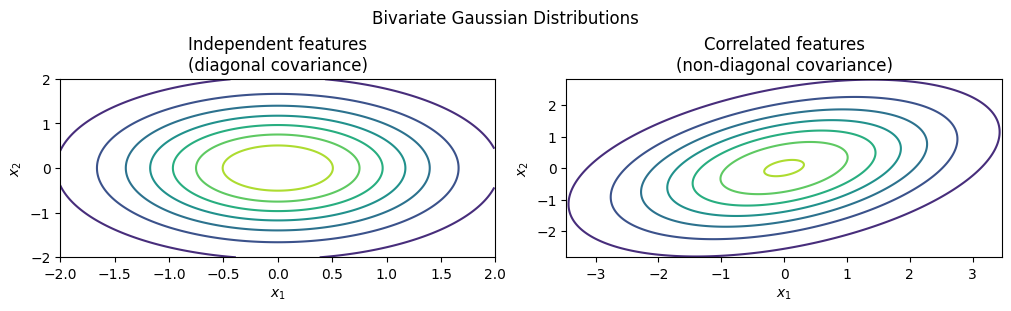

In [7]:
def plot_density(mu, Sigma, ax=None):
    """
    Plot contours of a 2D Gaussian density.
    
    Only works for bivariate (2D) Gaussians.
    
    Parameters:
    mu: mean vector, shape (2,)
    Sigma: covariance matrix, shape (2, 2)
    ax: matplotlib axis to plot on (creates new if None)
    
    Returns:
    ax: the axis object used for plotting
    """
    # Define plotting range: mean ± 2 standard deviations for each dimension
    # Sigma[0,0] is variance of first dimension
    # np.sqrt(Sigma[0,0]) is standard deviation of first dimension
    r1 = mu[0] - 2*np.sqrt(Sigma[0, 0]), mu[0] + 2*np.sqrt(Sigma[0, 0])
    
    # Same for second dimension
    r2 = mu[1] - 2*np.sqrt(Sigma[1, 1]), mu[1] + 2*np.sqrt(Sigma[1, 1])
    
    # Create a 2D grid of points
    # np.mgrid creates a mesh grid with specified step size (0.01)
    # x1 and x2 are both 2D arrays with matching shapes
    # x1[i, j] contains the x1-coordinate of grid point (i, j)
    # x2[i, j] contains the x2-coordinate of grid point (i, j)
    x1, x2 = np.mgrid[r1[0]:r1[1]:0.01, r2[0]:r2[1]:0.01]
    
    # Flatten the grid into a list of points for density evaluation
    # x1.ravel() converts 2D grid to 1D array (e.g., (200, 200) → (40000,))
    # x2.ravel() does the same for the second dimension
    # np.vstack stacks them vertically: creates (2, 40000) array
    # .T transposes to (40000, 2) - each row is a point [x1, x2]
    x = np.vstack((x1.ravel(), x2.ravel())).T
    
    # Get current axis if none provided
    if not ax:
        ax = plt.gca()
    
    # Compute probability density at all grid points
    # p has shape (40000,) - one density value per grid point
    p = Gaussian(mu, Sigma).density(x)
    
    # Set axis limits to match the range we created
    ax.set_xlim(*r1)
    ax.set_ylim(*r2)
    
    # Plot contour lines
    # Reshape p back to 2D grid shape to match x1 and x2
    # This creates level curves where the density is constant
    ax.contour(x1, x2, p.reshape(x1.shape))
    
    # Label the axes
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    
    return ax

# Parameters for two different bivariate Gaussians
mu = np.zeros(2)  # Mean at origin (0, 0)

# Two different covariance matrices
Sigma_list = np.array([
    [[1., 0], [0, 1]],      # Identity matrix: independent dimensions, equal variance
    [[3, 1.], [1., 2.]]     # Correlated dimensions: off-diagonal elements ≠ 0
])

# Create side-by-side plots
fig, axes = plt.subplots(ncols=len(Sigma_list), nrows=1, constrained_layout=True, 
                         figsize=(10, 3))

# Plot each Gaussian
for i, Sigma in enumerate(Sigma_list):
    plot_density(mu, np.array(Sigma), axes[i])
    # Add title describing the covariance structure
    if i == 0:
        axes[i].set_title('Independent features\n(diagonal covariance)')
    else:
        axes[i].set_title('Correlated features\n(non-diagonal covariance)')

plt.suptitle('Bivariate Gaussian Distributions')
plt.show()

the **maximum likelihood** estimate is similarly calculated

In [8]:
def gaussian_estimate(self, x):
    """
    Estimate multivariate Gaussian parameters using MLE.
    
    For samples from a multivariate Gaussian, the MLE estimates are:
    - μ_MLE = sample mean vector
    - Σ_MLE = sample covariance matrix
    
    Parameters:
    x: array of samples, shape (n, d)
       n = number of samples, d = dimensionality
    """
    n, d = x.shape
    
    # Compute sample mean: average each feature across all samples
    # np.mean(x, axis=0) averages along axis 0 (across samples)
    # Input shape: (n, d)
    # Output shape: (d,) - one mean per feature
    self.mu = np.mean(x, axis=0)
    
    # Center the data by subtracting the mean
    # self.mu has shape (d,)
    # Broadcasting: (n, d) - (d,) → (n, d)
    # xm[i, j] = x[i, j] - mu[j]
    xm = x - self.mu
    
    # Compute sample covariance matrix: Σ = (1/n) * XᵀX where X is centered
    # xm.T has shape (d, n)
    # xm has shape (n, d)
    # xm.T @ xm has shape (d, d) - this is XᵀX
    # Entry [i, j] = Σₖ xm[k, i] * xm[k, j]
    #              = covariance between feature i and feature j
    # Division by n normalizes to get the average
    self.Sigma = (xm.T @ xm) / n

# Add the estimate method to the Gaussian class
Gaussian.estimate = gaussian_estimate

# Test MLE on bivariate standard normal data
# Generate 1,000,000 independent samples from N(0, I)
# np.random.randn(n, d) samples from standard normal
# Shape: (1000000, 2)
x = np.random.randn(1000000, 2)

# Estimate parameters using MLE
gaussian = Gaussian()
gaussian.estimate(x)

# Verify that estimated Σ is close to identity matrix
# np.eye(2) is the 2×2 identity matrix [[1, 0], [0, 1]]
# np.allclose checks if arrays are element-wise equal within tolerance
# atol=0.01 means absolute difference < 0.01 is considered equal
print(f'Estimated covariance matrix:\\n{gaussian.Sigma}')
print(f'Close to identity matrix: {np.allclose(gaussian.Sigma, np.eye(2), atol=.01)}')

Estimated covariance matrix:\n[[9.99070674e-01 1.30471013e-04]
 [1.30471013e-04 9.99268823e-01]]
Close to identity matrix: True


let's fit a bivariate Gaussian to non-Gaussian data 

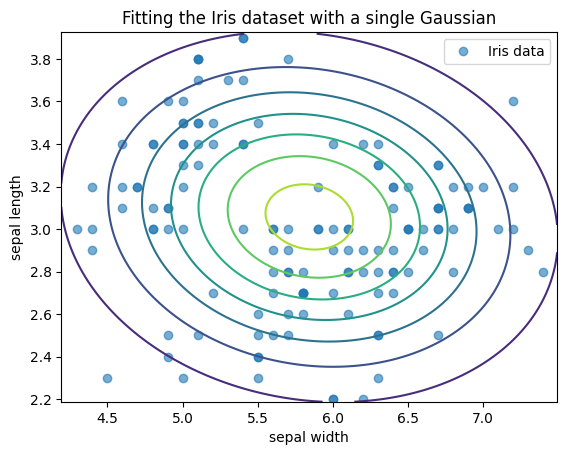

Estimated mean: [5.84333333 3.05733333]
Estimated covariance:\n[[ 0.68112222 -0.04215111]
 [-0.04215111  0.18871289]]


In [9]:
# Fit a bivariate Gaussian to the Iris dataset (which is NOT Gaussian)
# This demonstrates how Gaussian fitting works even on non-Gaussian data

# Load the famous Iris dataset
from sklearn import datasets
dataset = datasets.load_iris()

# Extract only the first 2 features (sepal width and length)
# dataset['data'] has shape (150, 4) with 4 features
# [:, :2] slices all rows, first 2 columns
# Result shape: (150, 2)
x = dataset['data'][:, :2]

# Fit a Gaussian to the data using MLE
gaussian = Gaussian()
gaussian.estimate(x)

# Plot the data points
# x[:, 0] selects column 0 (sepal width) - shape (150,)
# x[:, 1] selects column 1 (sepal length) - shape (150,)
plt.plot(x[:, 0], x[:, 1], 'o', label='Iris data', alpha=0.6)

# Overlay the fitted Gaussian density contours
# Even though the data has 3 distinct clusters (3 species),
# a single Gaussian fits an "average" bell-shaped distribution
plot_density(gaussian.mu, gaussian.Sigma)

plt.title("Fitting the Iris dataset with a single Gaussian")
plt.xlabel("sepal width")
plt.ylabel("sepal length")
plt.legend()
plt.show()

print(f'Estimated mean: {gaussian.mu}')
print(f'Estimated covariance:\\n{gaussian.Sigma}')

### Linear transformations
Let's transform the samples by a linear transformation $Q \in \!R^{d \times d}$, and see what happens to covariance $\Sigma$.
$$
\Sigma' = \frac{1}{n} \sum_{\ell=1}^n Q (x^{(\ell)}-\mu) (x^{\ell} - \mu)^\top Q^\top = Q \left( \frac{1}{n} \sum_{\ell=1}^n (x^{(\ell)}-\mu) (x^{\ell} - \mu)^\top \right ) Q^\top = Q \Sigma Q^\top
$$

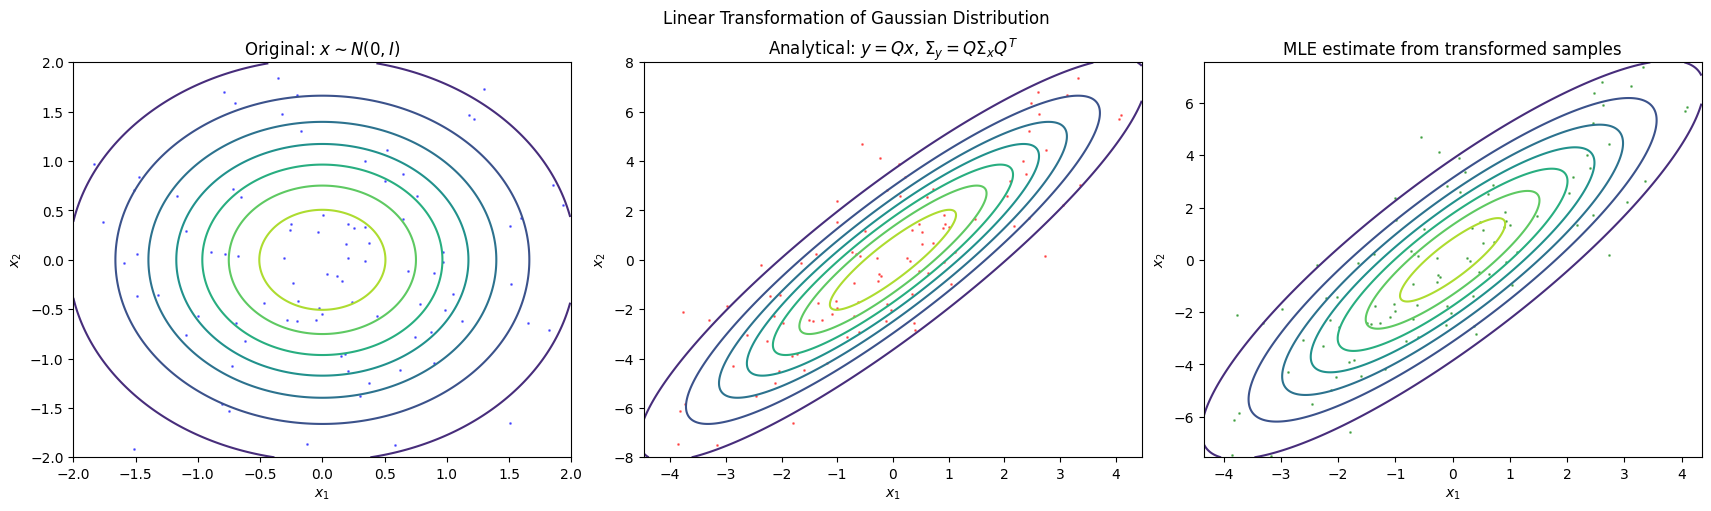

Analytical covariance Σ_y = QΣ_xQᵀ:\n[[ 5.  8.]
 [ 8. 16.]]
\nMLE estimated covariance:\n[[ 4.73564487  7.09207338]
 [ 7.09207338 14.27439043]]
\nClose match: False


In [10]:
# Demonstrate how linear transformations affect covariance
# If x ~ N(μ, Σ) and y = Qx, then y ~ N(Qμ, QΣQᵀ)

N, D = 100, 2

# Generate samples from standard bivariate normal N(0, I)
# Shape: (100, 2)
# Both dimensions are independent (covariance = 0)
x = np.random.randn(N, 2)

# Original covariance is identity (independent dimensions)
Sigma_x = np.eye(2)  # [[1, 0], [0, 1]]

# Define a linear transformation matrix Q
# This will stretch and shear the distribution
Q = np.array([[1, 2], [0, 4]])

# Apply linear transformation to all samples
# y = x @ Qᵀ (we use Qᵀ because x is (N, 2) and we want (N, 2) output)
# Matrix multiplication:
# - x has shape (N, 2)
# - Q.T has shape (2, 2)
# - Result has shape (N, 2)
# Each row: y[i] = x[i] @ Qᵀ = Qᵀ x[i]ᵀ → (Q x[i]ᵀ)ᵀ = x[i] Qᵀ
y = x @ Q.T

# Analytical covariance transformation: Σ_y = Q Σ_x Qᵀ
# This is the theoretical covariance of the transformed distribution
# Matrix multiplication: (2, 2) @ (2, 2) @ (2, 2) = (2, 2)
Sigma_y = Q @ Sigma_x @ Q.T

# Create three side-by-side plots for comparison
fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(17, 5))

# Left plot: Original distribution
plot_density(np.zeros(2), Sigma_x, axes[0])
# Scatter plot: x[:, 0] is first coordinate, x[:, 1] is second
axes[0].scatter(x[:, 0], x[:, 1], s=1, c='blue', alpha=0.5)
axes[0].set_title(r"Original: $x \sim N(0, I)$")

# Middle plot: Analytically transformed distribution
plot_density(np.zeros(2), Sigma_y, axes[1])
axes[1].scatter(y[:, 0], y[:, 1], s=1, c='red', alpha=0.5)
axes[1].set_title(r"Analytical: $y = Qx$, $\Sigma_y = Q\Sigma_x Q^T$")

# Right plot: MLE estimate from transformed samples
# This should match the analytical result
gaussian = Gaussian()
gaussian.estimate(y)
plot_density(np.zeros(2), gaussian.Sigma, axes[2])
axes[2].scatter(y[:, 0], y[:, 1], s=1, c='green', alpha=0.5)
axes[2].set_title(r"MLE estimate from transformed samples")

plt.suptitle('Linear Transformation of Gaussian Distribution')
plt.show()

print(f'Analytical covariance Σ_y = QΣ_xQᵀ:\\n{Sigma_y}')
print(f'\\nMLE estimated covariance:\\n{gaussian.Sigma}')
print(f'\\nClose match: {np.allclose(Sigma_y, gaussian.Sigma, atol=0.3)}')

Given a $\Sigma'$, we can always find a matrix $Q$ to make $\Sigma$ a diagonal matrix.
This means the density for a multivariate Normal with $\Sigma'$ as covariance can be produced starting from a Gaussian with diagonal covariance and linear transformation $Q$ of samples.
In fact, since $\Sigma'$ is symmetric and positive semi definite ($x^\top \Sigma' x \geq 0 \; \forall x$), $Q$ is an orthonormal matrix. 